## Altair fun

This prototypes some data visualization ideas we were experimenting with in a design studio using [Altair](https://altair-viz.github.io/).

You will need Jupyter Lab for this, and Altair 2.0.1.

In [1]:
import pandas as pd
import altair as alt
import numpy as np

In [2]:
EDU = 'Education'
EDU_NUM = 'EducationNum'
VENDOR = 'COMPANY NAME'
LABOR_CAT = 'Labor Category'
SCHEDULE = 'Schedule'
PRICE = 'CurrentYearPricing'
EXP = 'MinExpAct'
BEGIN = 'Begin Date'
TOTAL_EXP = 'TotalExp'

HIGH_SCHOOL = 'High School'
ASSOCIATES = 'Associates'
BACHELORS = 'Bachelors'
MASTERS = 'Masters'
PHD = 'Ph.D.'
EDU_ORDER = [HIGH_SCHOOL, ASSOCIATES, BACHELORS, MASTERS, PHD]

prices = pd.read_csv('../data/hourly_prices.csv', index_col=False, thousands=',')

# Remove all blank education values.
prices = prices[prices[EDU].notnull()]

# Remove a bunch of minimum experience value outliers.
prices = prices[prices[EXP] < 25]

# Create a new column that represents the number of years past
# high school required for each education level.
prices[EDU_NUM] = prices[EDU].map({
    HIGH_SCHOOL: 0.0,
    ASSOCIATES: 2.0,
    BACHELORS: 4.0,
    MASTERS: 6.0,
    PHD: 8.0,
})

# Create a new column that sums the minimum experience with
# the years of education required.
prices[TOTAL_EXP] = prices[EXP] + prices[EDU_NUM]

# Now filter only project managers.
pms = prices[prices[LABOR_CAT].str.contains('Project Manager')]

# Remove silly outliers.
pms = pms[pms[PRICE] < 1000]

print(len(pms))
pms.head()

1926


Labor Category  Year 1/base  Year 2  Year 3  Year 4  Year 5  \
256            Project Manager       399.15  399.15  399.15  399.15  399.15   
298         Project Manager II       383.05  392.62  402.44  412.50  422.81   
306  Executive Project Manager       381.57  395.88  410.73  426.13  442.11   
307  Executive Project Manager       381.57  395.88  410.73  426.13  442.11   
308  Executive Project Manager       381.57  395.88  410.73  426.13  442.11   

     Education  MinExpAct Bus Size         Location  \
256  Bachelors       10.0        O             Both   
298  Bachelors        8.0        S              NaN   
306  Bachelors       22.0        O  Contractor Site   
307  Bachelors       22.0        O  Contractor Site   
308  Bachelors       22.0        O  Contractor Site   

                                          COMPANY NAME    CONTRACT .  \
256                       Towers Watson Delaware, Inc.  GS-10F-0170P   
298  The On Purpose Group, LLC (D.B.A.) The On Purp...  GS-10F-0052Y   
306        Logistics Management Institute (d.b.a.) Lmi  GS-00F-0026M   
307        Logistics Management Institute (d.b.a.) Lmi  GS-00F-0026M   
308        Logistics Management Institute (d.b.a.) Lmi  GS-00F-0026M   

         Schedule                                         SIN NUMBER  \
256         MOBIS                                              874-1   
298         MOBIS                                          874-1/1RC   
306  Consolidated  C 874-501, C 874-503, C 874-504, C 874-505, C ...   
307  Consolidated        C595-21, C520-11, C520-12, C520-13, C520-15   
308  Consolidated  C871-202, C871-203, C871-205, C871-206, C871-2...   

     Contract Year  Begin Date    End Date  CurrentYearPricing  EducationNum  \
256              2    2/2/2004    2/1/2019              399.15           4.0   
298              5  11/14/2011  11/13/2016              422.81           4.0   
306              5   10/1/1997   9/30/2016              442.11           4.0   
307              5   10/1/1997   9/30/2016              442.11           4.0   
308              5   10/1/1997   9/30/2016              442.11           4.0   

     TotalExp  
256      14.0  
298      12.0  
306      26.0  
307      26.0  
308      26.0

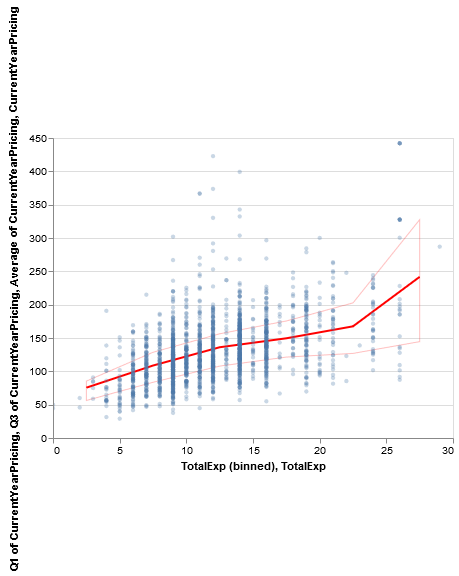

In [3]:
avg_line = alt.Chart(pms).mark_line(
    opacity=1.0,
    color="red",
).encode(
    x=alt.X(TOTAL_EXP, bin=True),
    y=alt.Y(f"average({PRICE})"),
)

quartile_area = alt.Chart(pms).mark_area(
    opacity=0.25,
    color="red",
    filled=False
).encode(
    x=alt.X(TOTAL_EXP, bin=True),
    y=alt.Y(f"q1({PRICE})"),
    y2=alt.Y(f"q3({PRICE})"),
)

dots = alt.Chart(pms).mark_circle(opacity=0.3, size=20.0).encode(
    x=TOTAL_EXP,
    y=PRICE,
    tooltip=VENDOR,
)

(quartile_area + avg_line + dots).interactive()